<a href="https://colab.research.google.com/github/Tejasri1557/ADM_2025/blob/main/Human_vs_AI_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import joblib
import warnings
import string
import os
import re

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    roc_auc_score
)
warnings.filterwarnings("ignore")

Load the dataset

In [16]:
# Load the dataset
file_path = "/content/your_dataset_5000.csv"
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded successfully!
Shape of dataset: (5000, 2)

First 5 rows:
                                                text  label
0  Exercise plays a crucial role in supporting me...      1
1  Renewable energy helps fight climate change by...      1
2  A futuristic smart city is a vibrant, intercon...      1
3  Healthy eating habits are especially important...      1
4  Machine learning is transforming healthcare by...      1


Text Preprocessing

In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s.,!?']", ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning
df["text"] = df["text"].apply(clean_text)
df[["text", "label"]].head()

,text,label
0,exercise plays a crucial role in supporting me...,1
1,renewable energy helps fight climate change by...,1
2,"a futuristic smart city is a vibrant, intercon...",1
3,healthy eating habits are especially important...,1
4,machine learning is transforming healthcare by...,1


Train-Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"],
    test_size=0.2,
    random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 4000
Test size: 1000


TF-IDF Vectorization


In [41]:
from sklearn.pipeline import Pipeline

# Define and train Random Forest
model_rf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", RandomForestClassifier(random_state=42))])
model_rf.fit(X_train, y_train)

# Define and train Linear SVC
model_svm = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LinearSVC())])
model_svm.fit(X_train, y_train)

# Define and train Naive Bayes
model_nb = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_nb.fit(X_train, y_train)

# Define and train Logistic Regression
model_lr = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression(random_state=42))
])
model_lr.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(random_state=42))])

In [20]:
print(f"\nTrain Accuracy: {model_rf.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {model_rf.score(X_test, y_test):.2f}")


Train Accuracy: 1.00
Test Accuracy: 0.99


In [21]:
# Predict on new samples
new_texts = [
    "Space exploration is crucial for the future of humanity.",
    "Eating fruits and vegetables is essential for good health."
]

predictions = model_rf.predict(new_texts)
for text, label in zip(new_texts, predictions):
    print("\nText:", text)
    print("Predicted Label:", label)


Text: Space exploration is crucial for the future of humanity.
Predicted Label: 0

Text: Eating fruits and vegetables is essential for good health.
Predicted Label: 1


Visualize Dataset

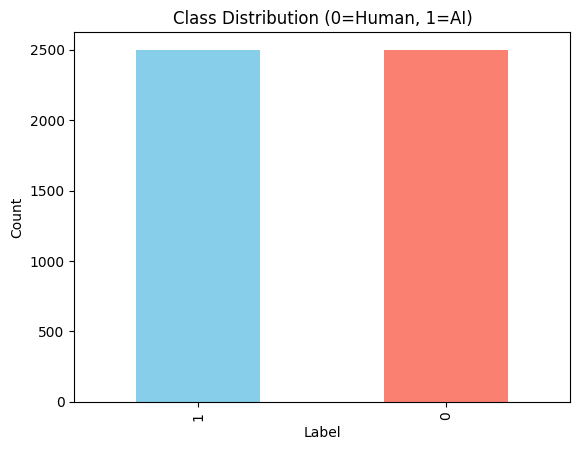

In [22]:
# Visualize class distribution
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (0=Human, 1=AI)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

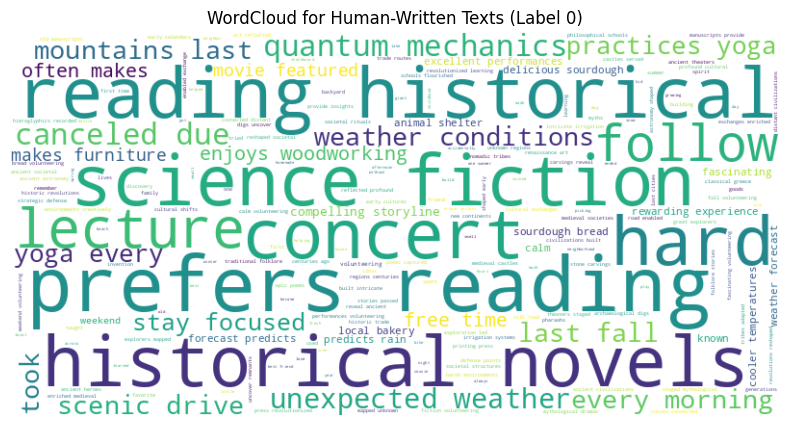

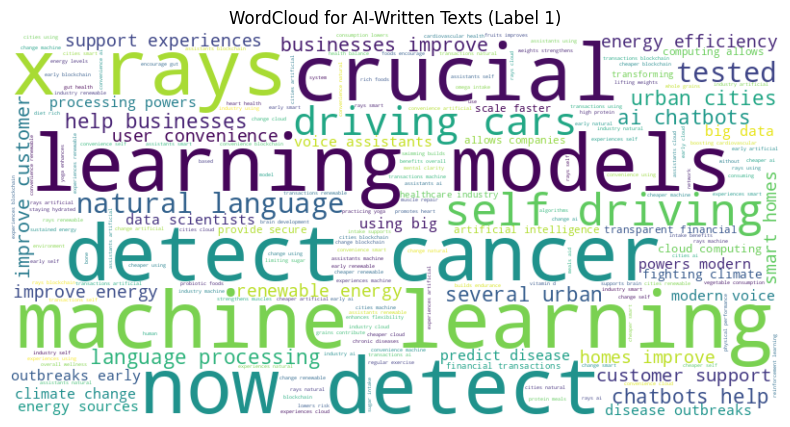

In [23]:
# WordCloud for Human-written text
text_class_0 = " ".join(df[df['label'] == 0]['text'])
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(text_class_0)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Human-Written Texts (Label 0)')
plt.show()

# WordCloud for AI-generated text
text_class_1 = " ".join(df[df['label'] == 1]['text'])
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(text_class_1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for AI-Written Texts (Label 1)')
plt.show()

Visualize Confusion Matrix for Each Model

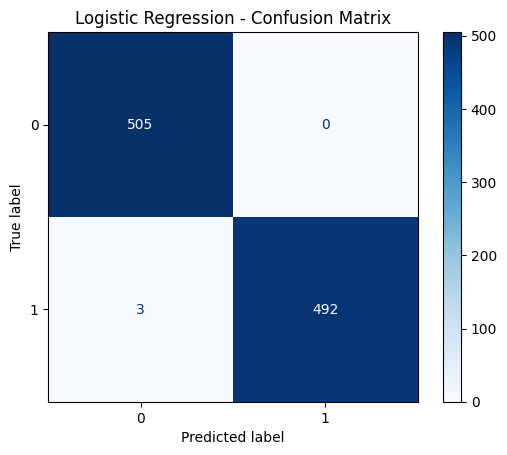

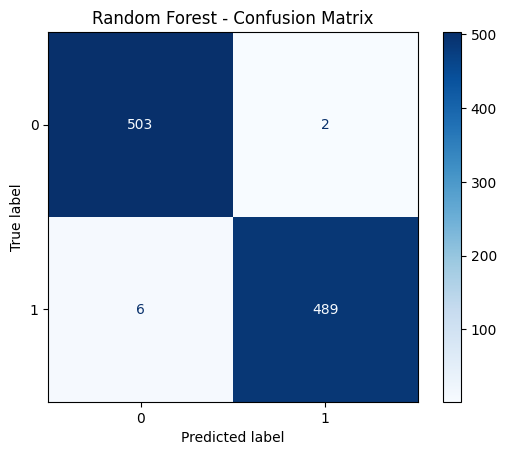

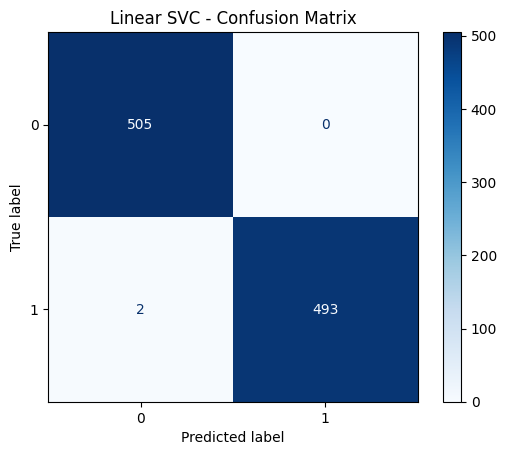

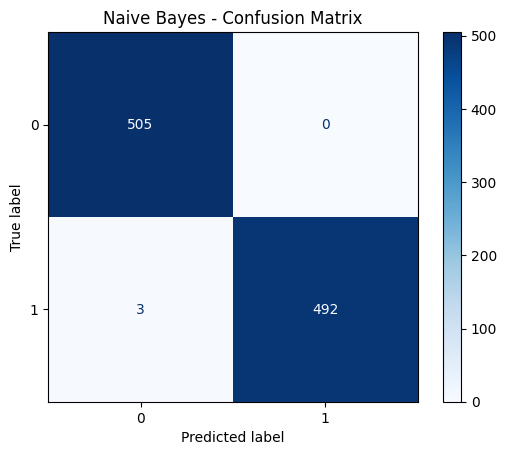

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate models
models_dict = {
    "Logistic Regression": model_lr,
    "Random Forest": model_rf,
    "Linear SVC": model_svm,
    "Naive Bayes": model_nb
}

for name, mdl in models_dict.items():
    y_pred = mdl.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

Word2Vec + LSTM Model

In [25]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 29.6 MB/s eta 0:00:00


In [26]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np


# Tokenize text

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
max_len = 100

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Train Word2Vec model

In [28]:
sentences = [text.split() for text in X_train]
w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1)

# Create embedding matrix

In [29]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v.wv:
        embedding_matrix[i] = w2v.wv[word]

# LSTM model

In [30]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.4823 - loss: 0.6926 - val_accuracy: 0.5060 - val_loss: 0.6925
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4925 - loss: 0.6907 - val_accuracy: 0.5060 - val_loss: 0.6925
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5101 - loss: 0.6903 - val_accuracy: 0.5060 - val_loss: 0.6925
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5403 - loss: 0.6828 - val_accuracy: 0.4950 - val_loss: 0.6929
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4993 - loss: 0.6914 - val_accuracy: 0.4940 - val_loss: 0.6926


BERT + LSTM

In [31]:
!pip install transformers tensorflow

In [32]:
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import tensorflow as tf
import numpy as np

# Load tokenizer and model

In [33]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased', use_safetensors=False)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/536M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training

# Encode text

In [34]:
def encode(texts, max_len=100):
    tokens = tokenizer(
        list(texts), max_length=max_len, padding='max_length',
        truncation=True, return_tensors='tf'
    )
    return tokens['input_ids'], tokens['attention_mask']

X_train_ids, X_train_mask = encode(X_train)
X_test_ids, X_test_mask = encode(X_test)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Define a custom Keras Model to wrap the TFBertModel
class BertClassifier(Model):
    def __init__(self, bert_model, num_classes=1, **kwargs):
        super().__init__(**kwargs)
        self.bert = bert_model
        # Set BERT layer to not trainable if you only want to use its embeddings
        # self.bert.trainable = False
        self.lstm = LSTM(128)
        self.classifier = Dense(num_classes, activation='sigmoid')

    def call(self, inputs):
        input_ids, attention_mask = inputs
        # The TFBertModel expects these as keyword arguments
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        # Access the last_hidden_state from the BERT output
        bert_sequence_output = bert_output.last_hidden_state
        lstm_out = self.lstm(bert_sequence_output)
        output = self.classifier(lstm_out)
        return output

# Instantiate the custom model
bert_classifier_model = BertClassifier(bert, num_classes=1)

# Define the inputs using the Keras functional API
input_ids_layer = Input(shape=(100,), dtype=tf.int32, name='input_ids')
attention_mask_layer = Input(shape=(100,), dtype=tf.int32, name='attention_mask')

# Connect inputs to the custom model
output_tensor = bert_classifier_model([input_ids_layer, attention_mask_layer])

# Create the final Keras Model
model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=output_tensor)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit([X_train_ids, X_train_mask], y_train, epochs=2, batch_size=16,
          validation_data=([X_test_ids, X_test_mask], y_test))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 144ms/step - accuracy: 0.9779 - loss: 0.0496 - val_accuracy: 1.0000 - val_loss: 2.4853e-04
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 139ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 1.5806e-04


Classification Reports & Confusion Matrices

In [36]:
def evaluate_model(model, X_test, y_test, model_name):
    """Prints classification report and shows heatmap of confusion matrix."""
    y_pred = model.predict(X_test)

    print(f"\n📄 Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred, target_names=["Human", "AI"]))

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Human", "AI"], yticklabels=["Human", "AI"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


📄 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

       Human       0.99      1.00      1.00       505
          AI       1.00      0.99      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



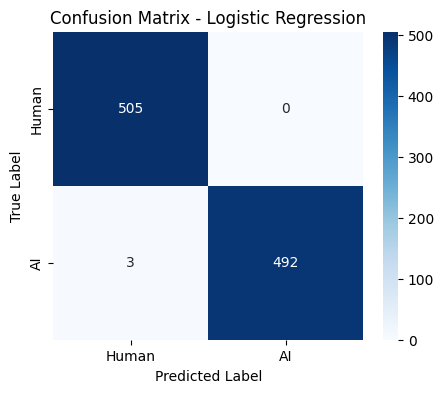


📄 Classification Report for Random Forest:

              precision    recall  f1-score   support

       Human       0.99      1.00      0.99       505
          AI       1.00      0.99      0.99       495

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



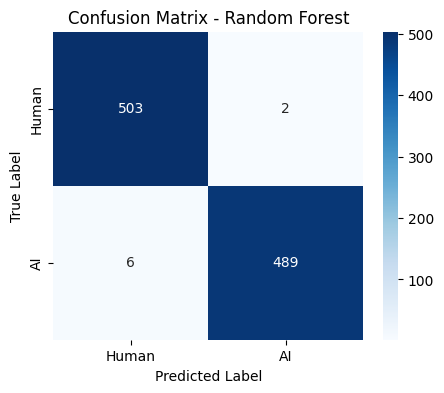


📄 Classification Report for Linear SVC:

              precision    recall  f1-score   support

       Human       1.00      1.00      1.00       505
          AI       1.00      1.00      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



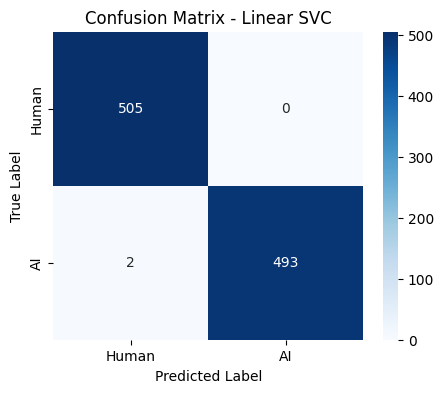


📄 Classification Report for Naive Bayes:

              precision    recall  f1-score   support

       Human       0.99      1.00      1.00       505
          AI       1.00      0.99      1.00       495

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



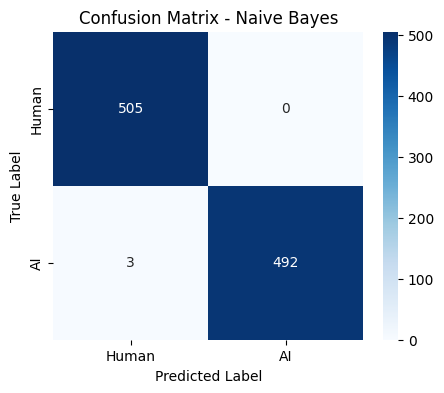

In [37]:
# Run evaluations for all models
evaluate_model(model_lr, X_test, y_test, "Logistic Regression")
evaluate_model(model_rf, X_test, y_test, "Random Forest")
evaluate_model(model_svm, X_test, y_test, "Linear SVC")
evaluate_model(model_nb, X_test, y_test, "Naive Bayes")

Visualize ROC Curves for Models with Probabilities


In [38]:
# Function to calculate ROC and AUC if model supports predict_proba
def plot_roc(model, label):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")
    else:
        print(f"{label} skipped: no probability output (predict_proba)")


Logistic Regression skipped: no probability output (predict_proba)


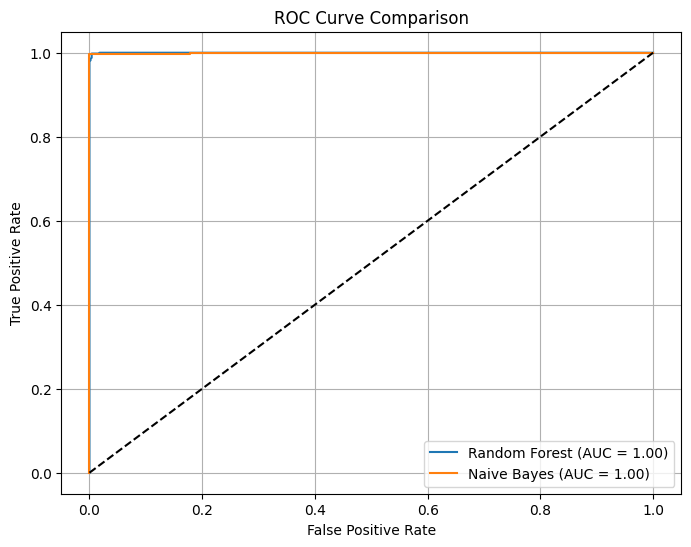

In [39]:
# Start plotting
plt.figure(figsize=(8, 6))
plot_roc(model, "Logistic Regression")
plot_roc(model_rf, "Random Forest")
plot_roc(model_nb, "Naive Bayes")

plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [42]:
# Access vectorizer and classifier from the pipeline
vectorizer = model_lr.named_steps['tfidf']
classifier = model_lr.named_steps['clf']

# Get feature names and model coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = classifier.coef_[0]

# Top positive coefficients (indicating AI-generated text)
top_positive_idx = coefficients.argsort()[-10:][::-1]
top_positive_words = feature_names[top_positive_idx]

# Top negative coefficients (indicating human-written text)
top_negative_idx = coefficients.argsort()[:10]
top_negative_words = feature_names[top_negative_idx]

# Print results
print("Top 10 words predicting AI text (Label 1):", top_positive_words)
print("Top 10 words predicting Human text (Label 0):", top_negative_words)

Top 10 words predicting AI text (Label 1): ['can' 'energy' 'ai' 'are' 'artificial' 'intelligence' 'improve'
 'healthcare' 'transforming' 'industry']
Top 10 words predicting Human text (Label 0): ['the' 'my' 'was' 'ancient' 'she' 'weather' 'every' 'at' 'morning'
 'focused']


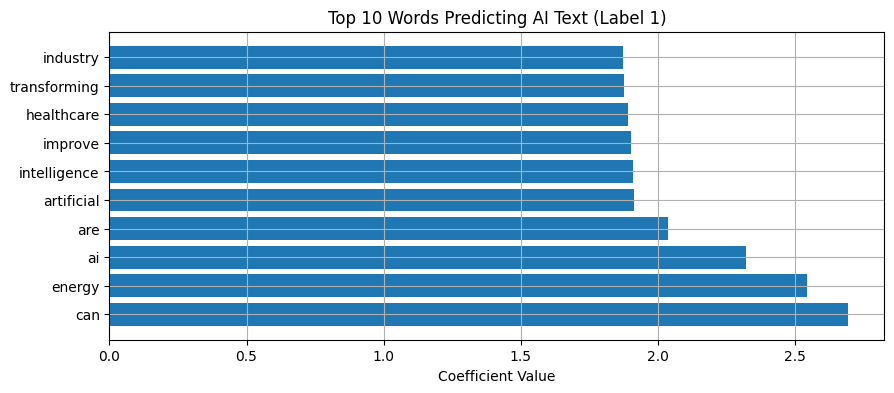

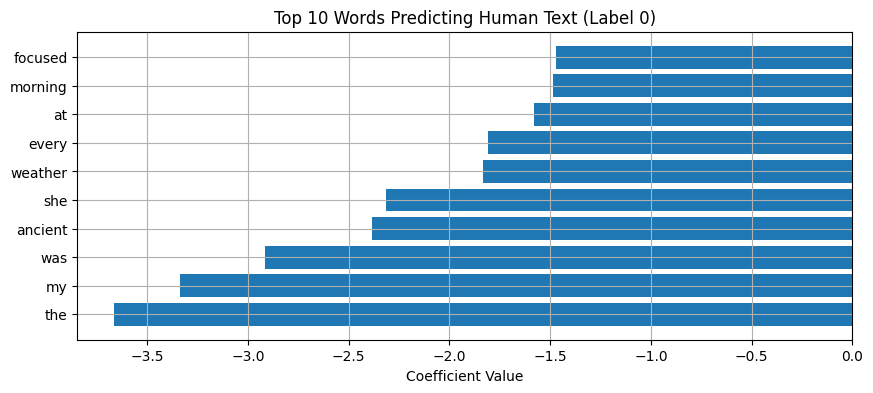

In [43]:
# Plot top positive (AI) words
plt.figure(figsize=(10, 4))
plt.barh(top_positive_words, coefficients[top_positive_idx])
plt.title("Top 10 Words Predicting AI Text (Label 1)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.show()

# Plot top negative (Human) words
plt.figure(figsize=(10, 4))
plt.barh(top_negative_words, coefficients[top_negative_idx])
plt.title("Top 10 Words Predicting Human Text (Label 0)")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.show()

Compare Model Accuracies

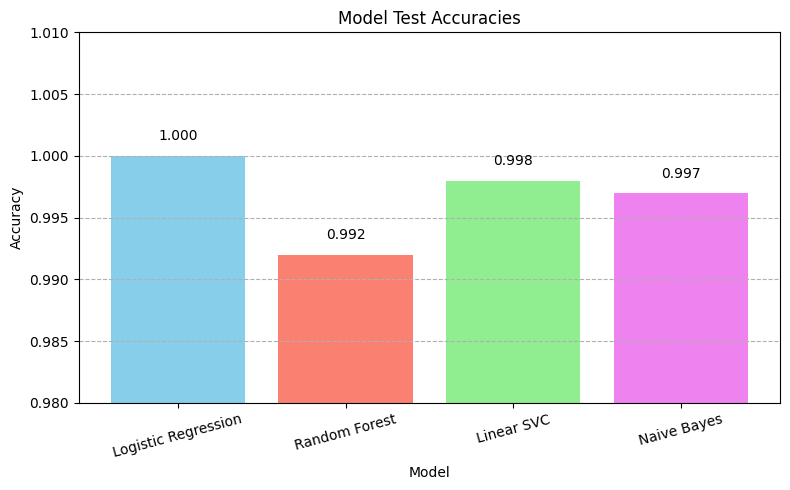

In [44]:
# Data to plot
models = ['Logistic Regression', 'Random Forest', 'Linear SVC', 'Naive Bayes']
accuracies = [1.00, 0.992, 0.998, 0.997]
colors = ['skyblue', 'salmon', 'lightgreen', 'violet']

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0.98, 1.01)
plt.title('Model Test Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')

# Add accuracy values on top of each bar
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f"{acc:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()